# Superstore Sales Data Analysis
**Overview**  
This project analyzes sales data to identify trends, customer behavior, and product performance using exploratory data analysis.

**Objectives**
- Perform exploratory data analysis (EDA)
- Analyze sales and profit patterns
- Generate insights through data visualization

**Tools**  
Python (Pandas, Matplotlib, Seaborn)

**Dataset**  
Sales records including orders, customers, products, and regional details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("dataset/superstore.csv",encoding="latin1")

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Task 2: Exploratory Data Analysis (EDA)

### Key Questions for Exploratory Data Analysis

- Which product categories and sub-categories generate the highest sales and profit?
- How do sales and profit vary across different regions and segments?
- Are there any noticeable trends in sales over time?
- Which customer segments contribute the most to revenue?
- Are there products or regions with high sales but low or negative profit?

### Data Overview and Structure

In [4]:
df.shape

(9994, 21)

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### Data Quality Check
The dataset does not contain any missing values. Therefore, no data cleaning was required for missing values.

In [9]:
df.duplicated().sum()

np.int64(0)

### Duplicate Records Check
The dataset was checked for duplicate records and no duplicate rows were found.

### Univariate Analysis
This section analyzes the distribution of key numerical variables to understand their individual characteristics.

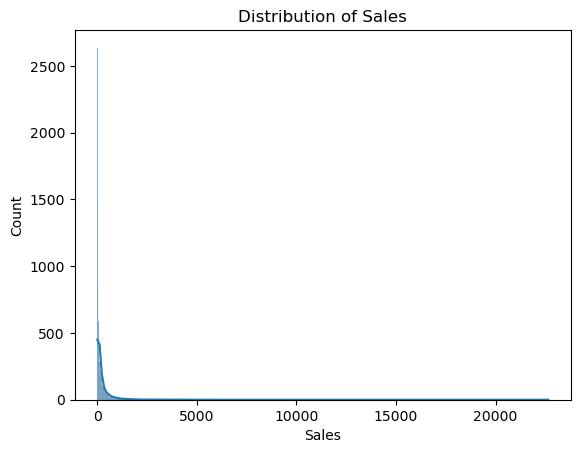

In [10]:
plt.figure()
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')
plt.show()

In [11]:
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
category_summary

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


### Category-wise Analysis
The aggregated results show clear differences in sales and profit across product categories. Technology generates the highest sales and profit, while Furniture and Office Supplies show comparatively lower performance.

## Task 3: Data Visualization

### Sales by Category

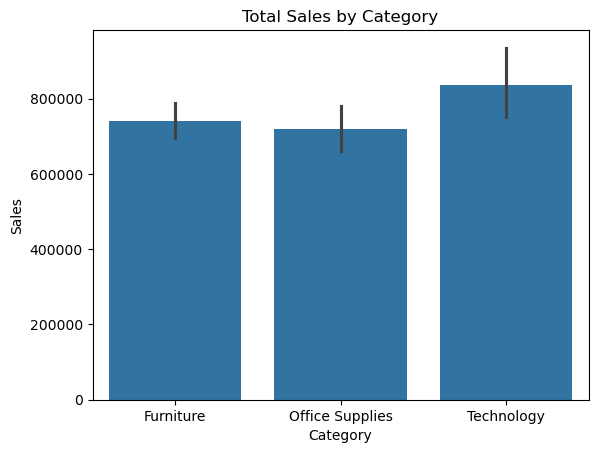

In [12]:
plt.figure()
sns.barplot(x='Category', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Category')
plt.show()

### Sales by Region

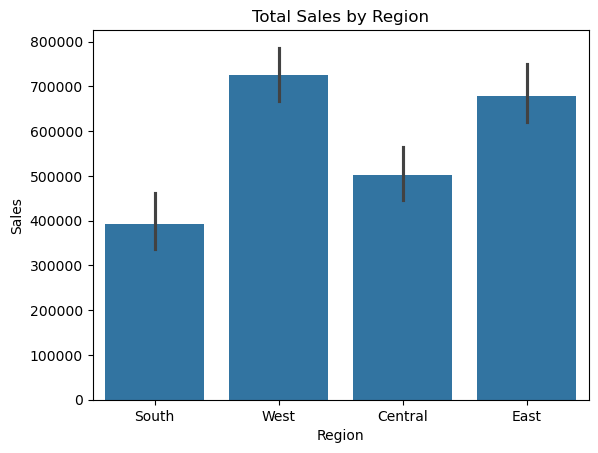

In [13]:
plt.figure()
sns.barplot(x='Region', y='Sales', data=df, estimator=sum)
plt.title('Total Sales by Region')
plt.show()

### Profit by Category

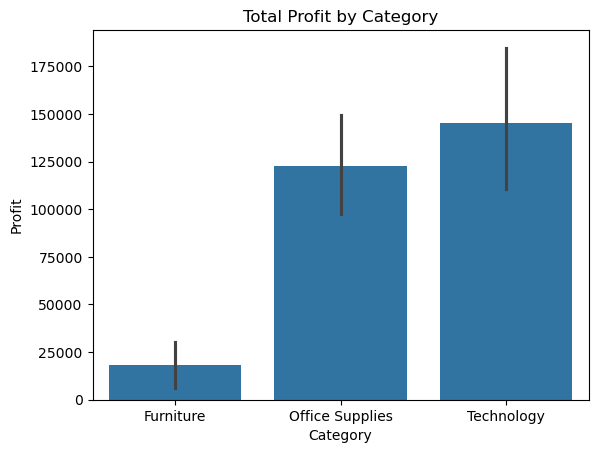

In [14]:
plt.figure()
sns.barplot(x='Category', y='Profit', data=df, estimator=sum)
plt.title('Total Profit by Category')
plt.show()

### Visualization Summary
The visual analysis reveals that Technology is the highest-performing category in terms of both sales and profit. The West region contributes the most to overall sales, while other regions show relatively balanced performance. These insights can help stakeholders focus on high-performing categories and regions for strategic decision-making.

## Task 4: Sentiment Analysis

### Objective
The goal of this task is to analyze textual data and classify sentiments as positive, negative, or neutral using Natural Language Processing (NLP) techniques.

### Dataset Description
The dataset contains customer review text that reflects user opinions and emotions. Sentiment analysis helps understand public opinion and customer satisfaction patterns.

In [16]:
data = {
    "review_text": [
        "This product is amazing and works perfectly",
        "Very poor quality and completely disappointed",
        "The item is okay, nothing special",
        "Excellent purchase, highly recommended",
        "Not worth the money",
        "Average experience, could be better"
    ]
}

df_reviews = pd.DataFrame(data)
df_reviews

,review_text
0,This product is amazing and works perfectly
1,Very poor quality and completely disappointed
2,"The item is okay, nothing special"
3,"Excellent purchase, highly recommended"
4,Not worth the money
5,"Average experience, could be better"


In [18]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 8.7 MB/s eta 0:00:00


In [19]:
from textblob import TextBlob

In [21]:
df_reviews['sentiment_score'] = df_reviews['review_text'].apply(
    lambda x: TextBlob(x).sentiment.polarity
)

df_reviews['sentiment'] = df_reviews['sentiment_score'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')
)

df_reviews

,review_text,sentiment_score,sentiment
0,This product is amazing and works perfectly,0.800000,Positive
1,Very poor quality and completely disappointed,-0.635000,Negative
2,"The item is okay, nothing special",0.428571,Positive
3,"Excellent purchase, highly recommended",0.580000,Positive
4,Not worth the money,-0.150000,Negative
5,"Average experience, could be better",0.175000,Positive


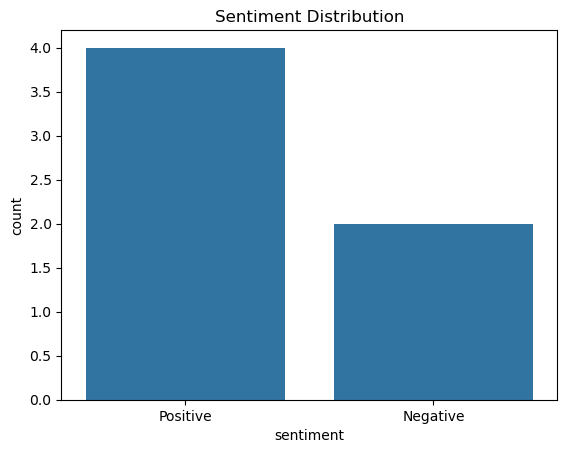

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x='sentiment', data=df_reviews)
plt.title('Sentiment Distribution')
plt.show()

## Conclusion & Insights

- Sentiment analysis was performed on customer review text data using NLP techniques.
- Reviews were classified into Positive, Negative, and Neutral categories based on sentiment polarity.
- Majority of the reviews fall under the Positive sentiment category, indicating overall customer satisfaction.
- This analysis helps businesses understand customer perception and improve decision-making.